Basic Information of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55712 entries, 0 to 55711
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                55712 non-null  int64  
 1   days_90_queries                           54275 non-null  float64
 2   flag_zpexp                                55712 non-null  int64  
 3   ageolddate_f7                             55259 non-null  float64
 4   f41_my                                    23777 non-null  float64
 5   age2                                      55712 non-null  float64
 6   f39_my                                    19307 non-null  float64
 7   active_crd_amount_to_limit                36437 non-null  float64
 8   sumlastvalue_7_f50                        33036 non-null  float64
 9   avg_active_credit_limit                   38207 non-null  float64
 10  

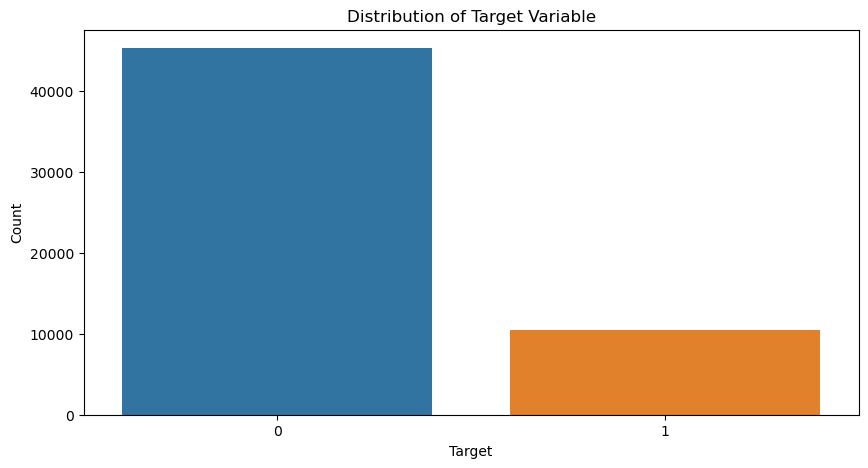

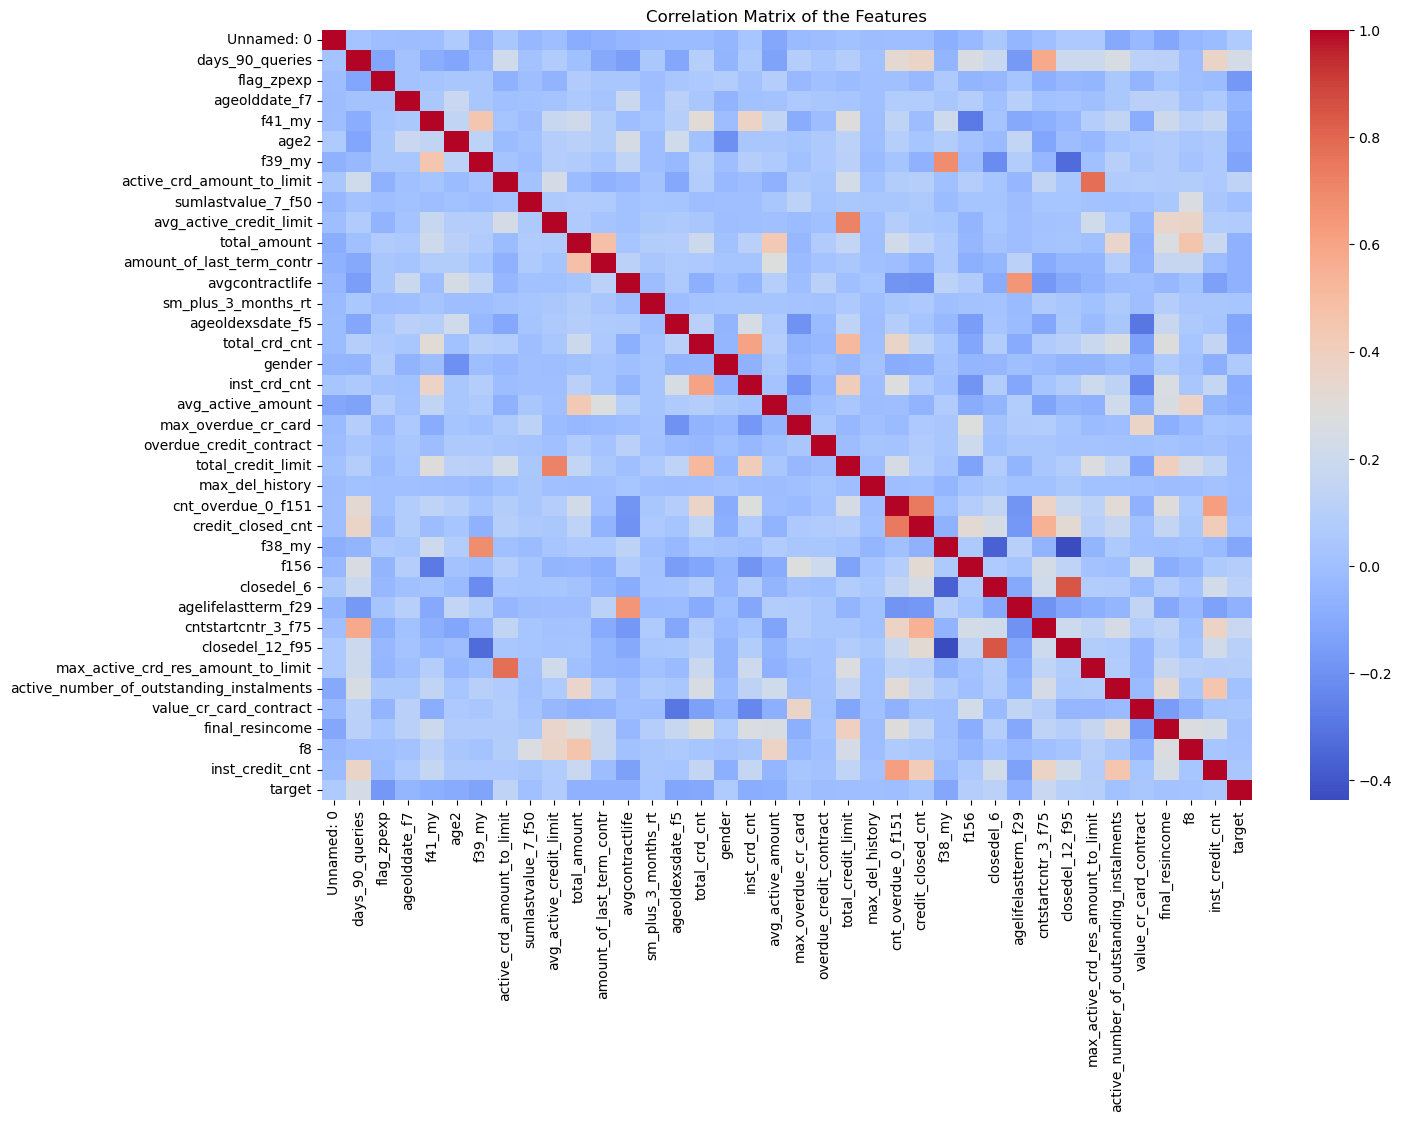

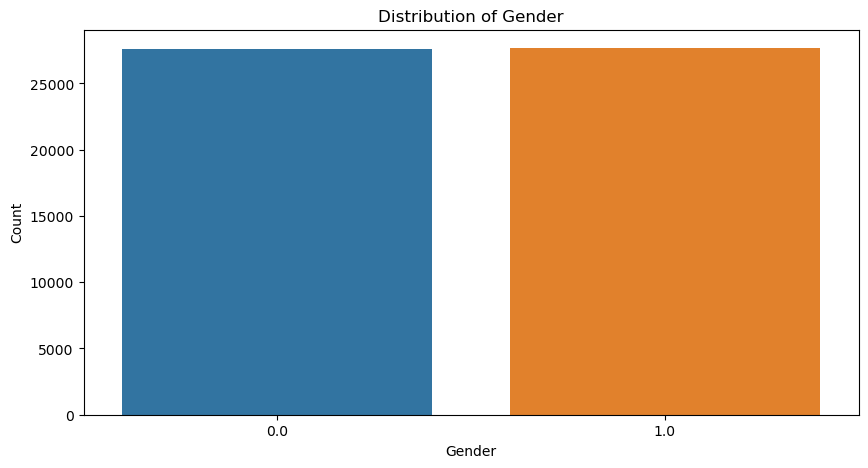

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


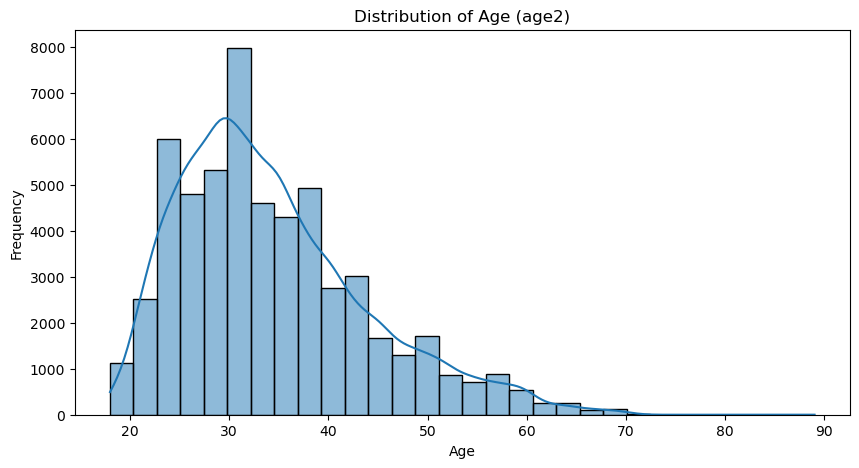

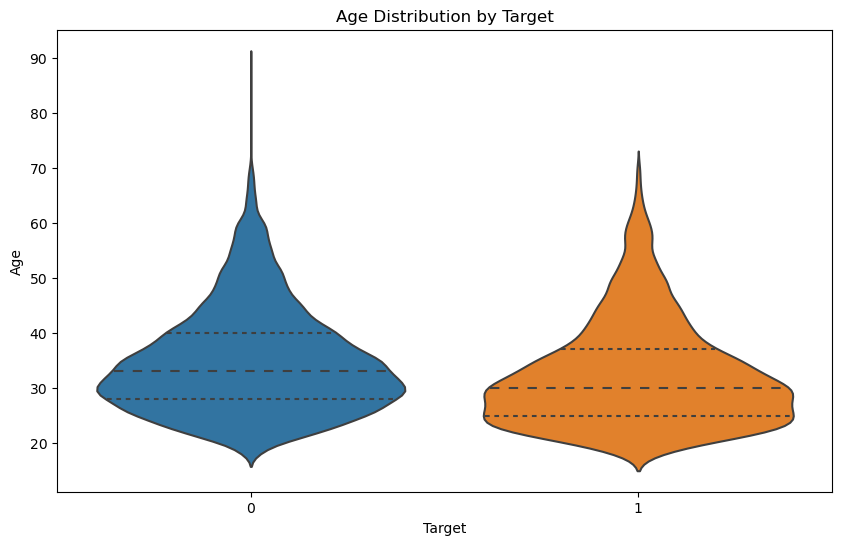

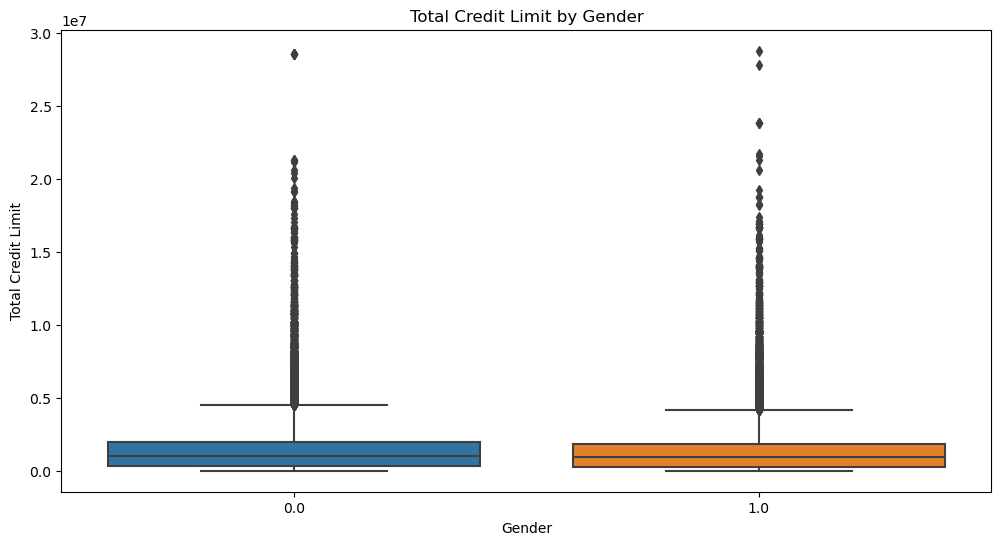

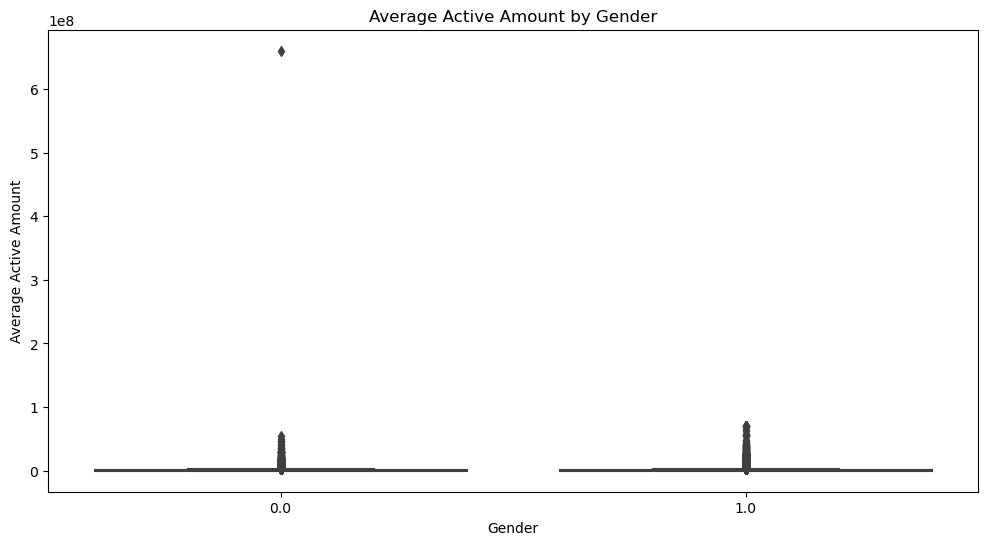

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


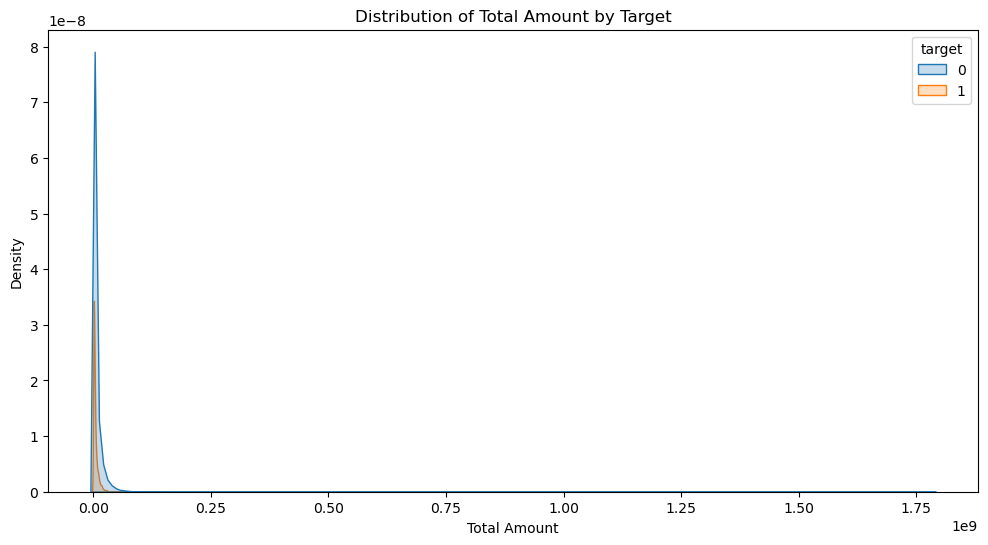

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


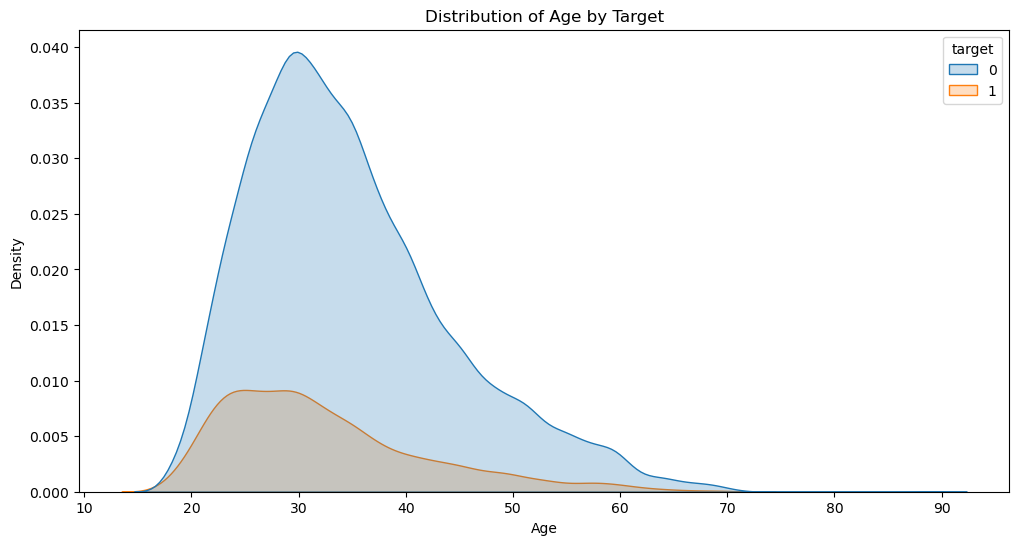

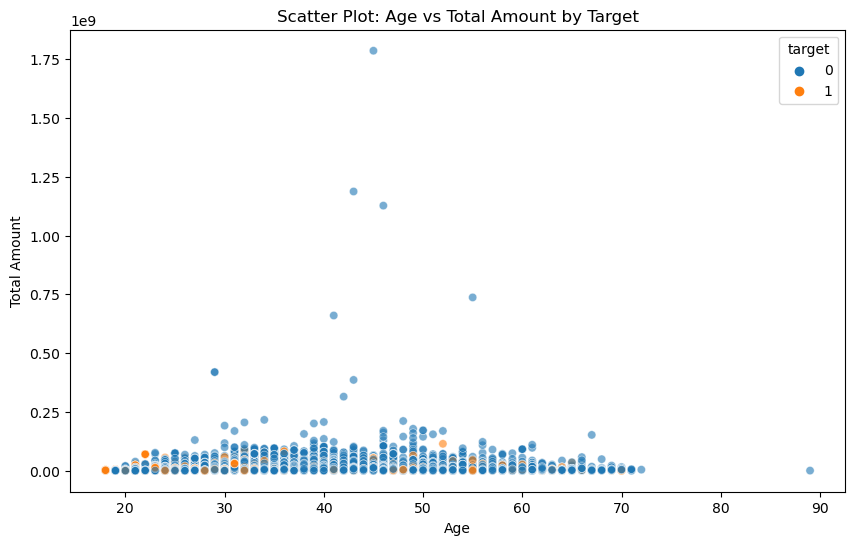

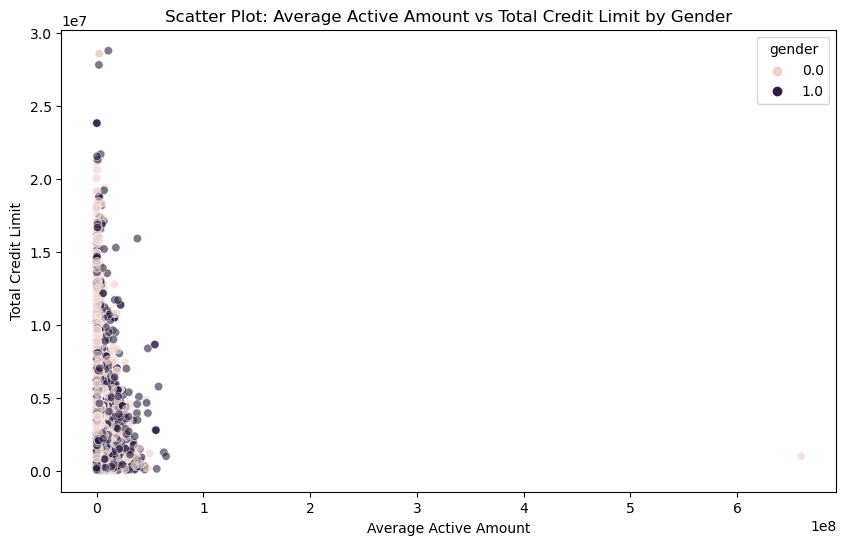

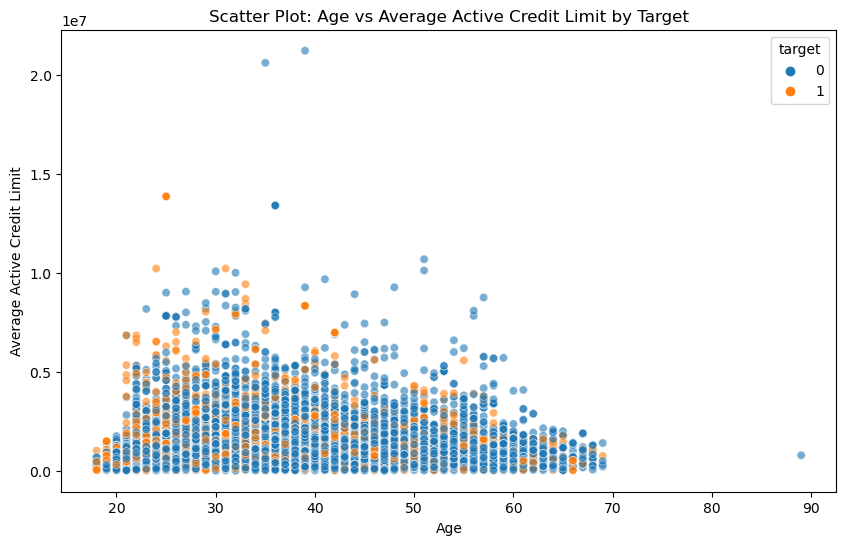

Остаточные пропущенные значения:
gender    55712
dtype: int64
Размер тестовой выборки (valid): (13520, 37)


C:\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Model: Decision Tree
Cross-Validation Accuracy Scores: [0.80902809 0.74468276 0.68156525 0.64754981 0.18721953]
Mean CV Accuracy: 0.6140090879402286

Accuracy: 0.8275887573964497
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     12169
         1.0       0.25      0.36      0.29      1351

    accuracy                           0.83     13520
   macro avg       0.59      0.62      0.60     13520
weighted avg       0.86      0.83      0.84     13520



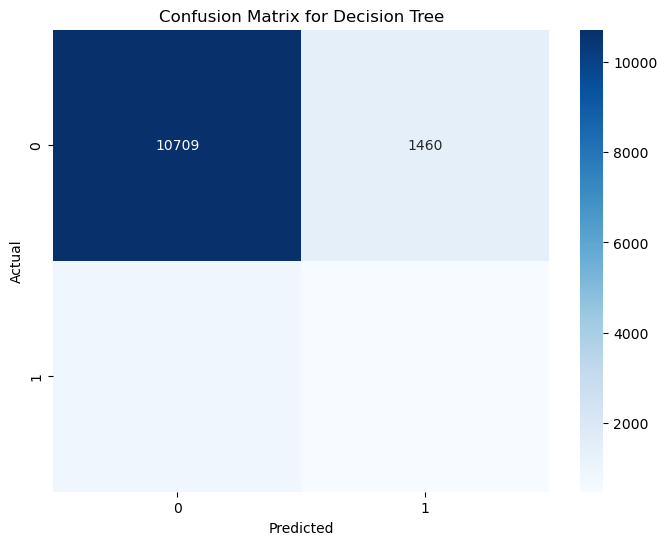

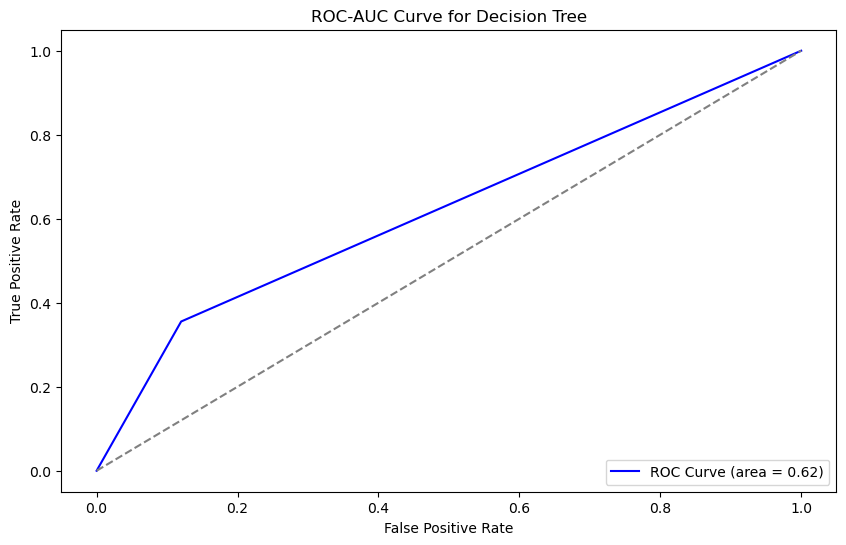


Model: Random Forest
Cross-Validation Accuracy Scores: [0.81315624 0.82446379 0.82220427 0.80425417 0.1916173 ]
Mean CV Accuracy: 0.6911391559858102

Accuracy: 0.9039201183431953
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     12169
         1.0       0.58      0.14      0.22      1351

    accuracy                           0.90     13520
   macro avg       0.75      0.56      0.59     13520
weighted avg       0.88      0.90      0.88     13520



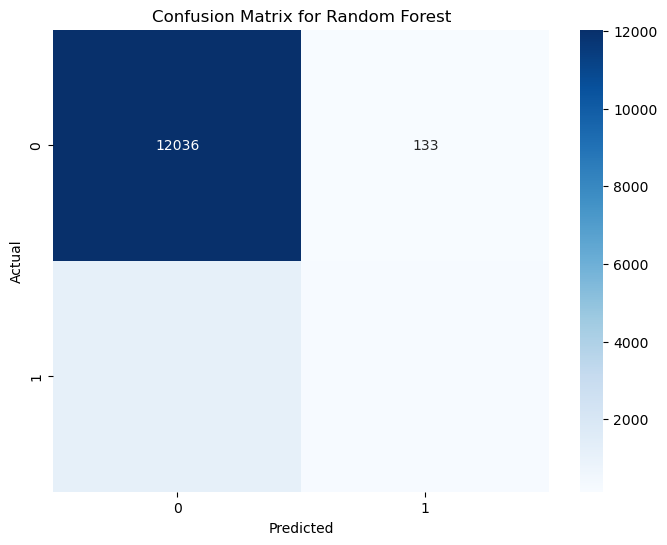

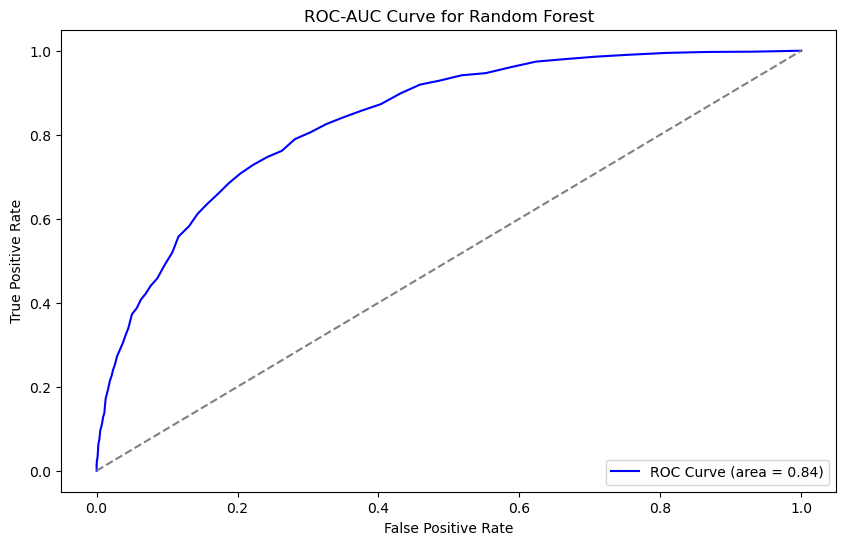


Model: Gradient Boosting
Cross-Validation Accuracy Scores: [0.81279727 0.69146549 0.68928379 0.63857476 0.18766828]
Mean CV Accuracy: 0.6039579202519141

Accuracy: 0.896819526627219
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     12169
         1.0       0.42      0.09      0.14      1351

    accuracy                           0.90     13520
   macro avg       0.66      0.54      0.54     13520
weighted avg       0.86      0.90      0.87     13520



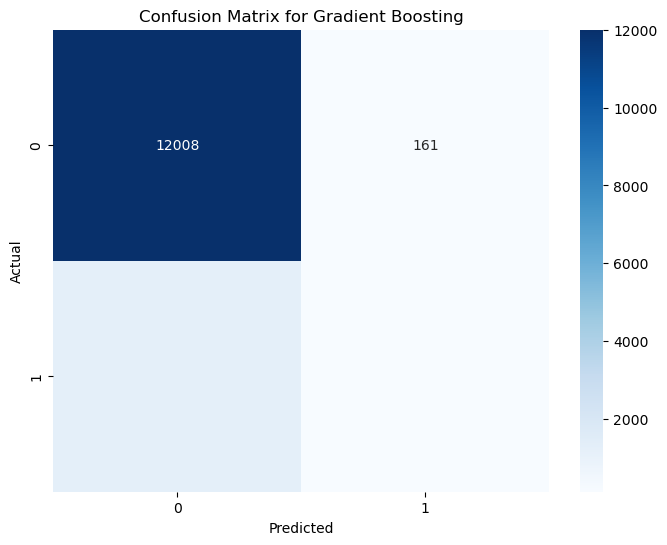

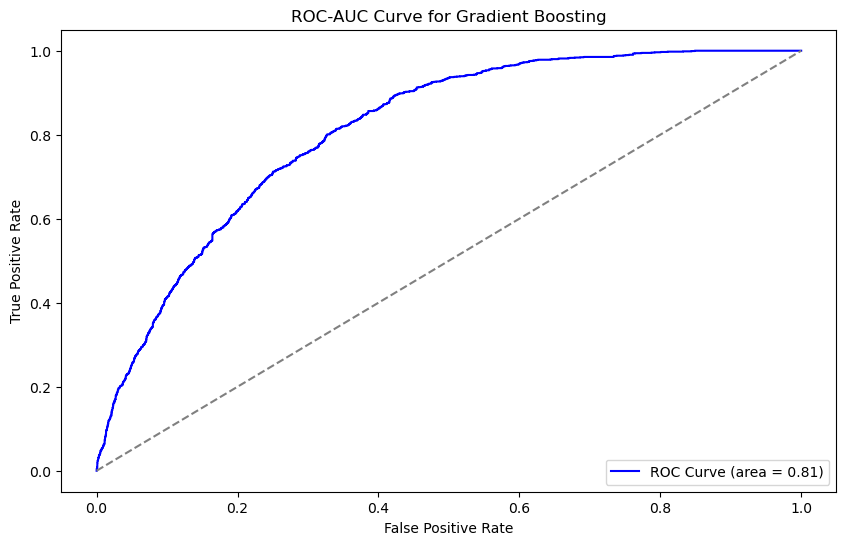


Model: Logistic Regression
Cross-Validation Accuracy Scores: [0.81988692 0.82239971 0.82399928 0.81233172 0.79339436]
Mean CV Accuracy: 0.8144024001680604

Accuracy: 0.8946745562130177
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     12169
         1.0       0.40      0.10      0.16      1351

    accuracy                           0.89     13520
   macro avg       0.65      0.54      0.55     13520
weighted avg       0.86      0.89      0.87     13520



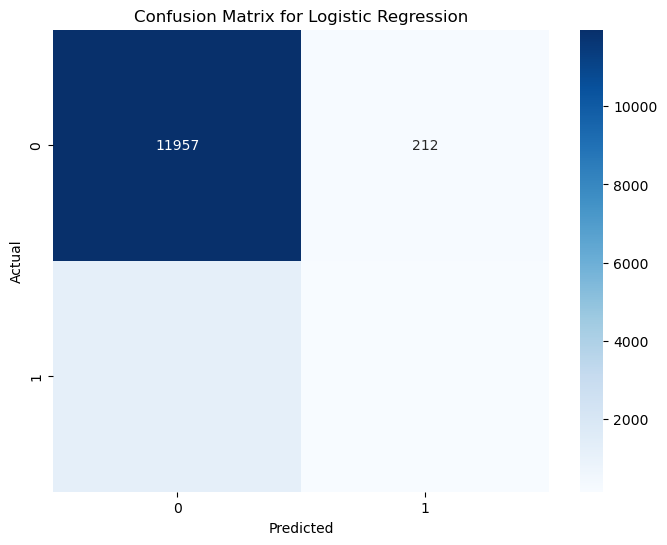

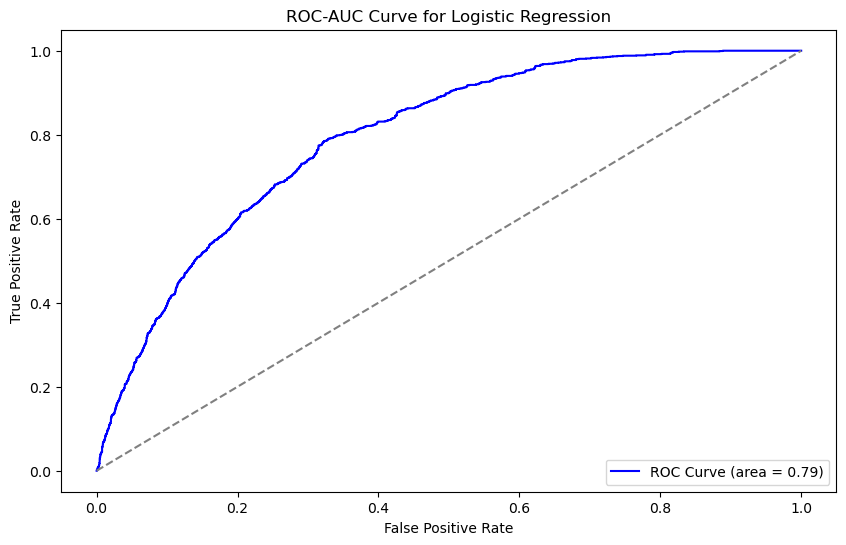

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'train_data.csv'
train_data = pd.read_csv(data_path)

print("Basic Information of the Dataset:")
print(train_data.info())

print("\nSummary Statistics:")
print(train_data.describe())

print("\nFirst Few Rows:")
print(train_data.head())

missing_values = train_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(15, 10))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of the Features')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=train_data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(train_data['age2'], kde=True, bins=30)
plt.title('Distribution of Age (age2)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, x='target', y='age2', inner='quartile')
plt.title('Age Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='gender', y='total_credit_limit')
plt.title('Total Credit Limit by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Credit Limit')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='gender', y='avg_active_amount')
plt.title('Average Active Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Active Amount')
plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(data=train_data, x='total_amount', hue='target', fill=True)
plt.title('Distribution of Total Amount by Target')
plt.xlabel('Total Amount')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=train_data, x='age2', hue='target', fill=True)
plt.title('Distribution of Age by Target')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='age2', y='total_amount', hue='target', alpha=0.6)
plt.title('Scatter Plot: Age vs Total Amount by Target')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='avg_active_amount', y='total_credit_limit', hue='gender', alpha=0.6)
plt.title('Scatter Plot: Average Active Amount vs Total Credit Limit by Gender')
plt.xlabel('Average Active Amount')
plt.ylabel('Total Credit Limit')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='age2', y='avg_active_credit_limit', hue='target', alpha=0.6)
plt.title('Scatter Plot: Age vs Average Active Credit Limit by Target')
plt.xlabel('Age')
plt.ylabel('Average Active Credit Limit')
plt.show()


numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='median')
train_data[numerical_cols] = imputer.fit_transform(train_data[numerical_cols])


if 'gender' in train_data.columns:
    train_data['gender'] = train_data['gender'].map({'male': 1, 'female': 0})


print("Остаточные пропущенные значения:")
print(train_data.isnull().sum()[train_data.isnull().sum() > 0])


X = train_data.drop(columns=['target'])
y = train_data['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


valid_data = pd.read_csv('valid_data.csv')


valid_data[numerical_cols] = imputer.transform(valid_data[numerical_cols])


valid_data.fillna(valid_data.median(), inplace=True)


if 'gender' in valid_data.columns:
    valid_data['gender'] = valid_data['gender'].map({'male': 1, 'female': 0})


X_valid = valid_data.drop(columns=['target'], errors='ignore')


X_valid = X_valid[X.columns]

y_valid = valid_data['target']


X_valid_scaled = scaler.transform(X_valid)


print(f"Размер тестовой выборки (valid): {X_valid_scaled.shape}")


X_scaled = np.nan_to_num(X_scaled)
X_valid_scaled = np.nan_to_num(X_valid_scaled)


models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"\nModel: {name}")
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean()}\n")
    
    
    model.fit(X_scaled, y)
    
    
    y_pred = model.predict(X_valid_scaled)
    
    print("Accuracy:", accuracy_score(y_valid, y_pred))
    print("Classification Report:")
    print(classification_report(y_valid, y_pred))
    
    
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_valid_scaled)[:, 1]
        auc_score = roc_auc_score(y_valid, y_prob)
        fpr, tpr, _ = roc_curve(y_valid, y_prob)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC-AUC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
